In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

file_path = '/content/PhiUSIIL_Phishing_URL_Dataset.csv'

df = pd.read_csv(file_path)
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [12]:
columns_to_drop = [
    'FILENAME', 'URL', 'URLLength', 'URLSimilarityIndex', 'CharContinuationRate', 'NoOfLettersInURL',
    'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
    'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
    'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
    'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
    'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
    'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
    'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'HasCopyrightInfo',
    'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
    'NoOfExternalRef','TLD', 'TLDLegitimateProb', 'URLCharProb','ObfuscationRatio'
]

# To drop these from your dataframe:
df = df.drop(columns=columns_to_drop)

In [13]:
df=df.fillna(' ')
df.isnull().sum()

,0
Domain,0
DomainLength,0
IsDomainIP,0
TLDLength,0
NoOfSubDomain,0
HasObfuscation,0
NoOfObfuscatedChar,0
IsHTTPS,0
Bank,0
Pay,0


In [14]:
df.head()

,Domain,DomainLength,IsDomainIP,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,IsHTTPS,Bank,Pay,Crypto,label
0,www.southbankmosaics.com,24,0,3,1,0,0,1,1,0,0,1
1,www.uni-mainz.de,16,0,2,1,0,0,1,0,0,0,1
2,www.voicefmradio.co.uk,22,0,2,2,0,0,1,0,0,0,1
3,www.sfnmjournal.com,19,0,3,1,0,0,1,0,1,1,1
4,www.rewildingargentina.org,26,0,3,1,0,0,1,1,1,0,1


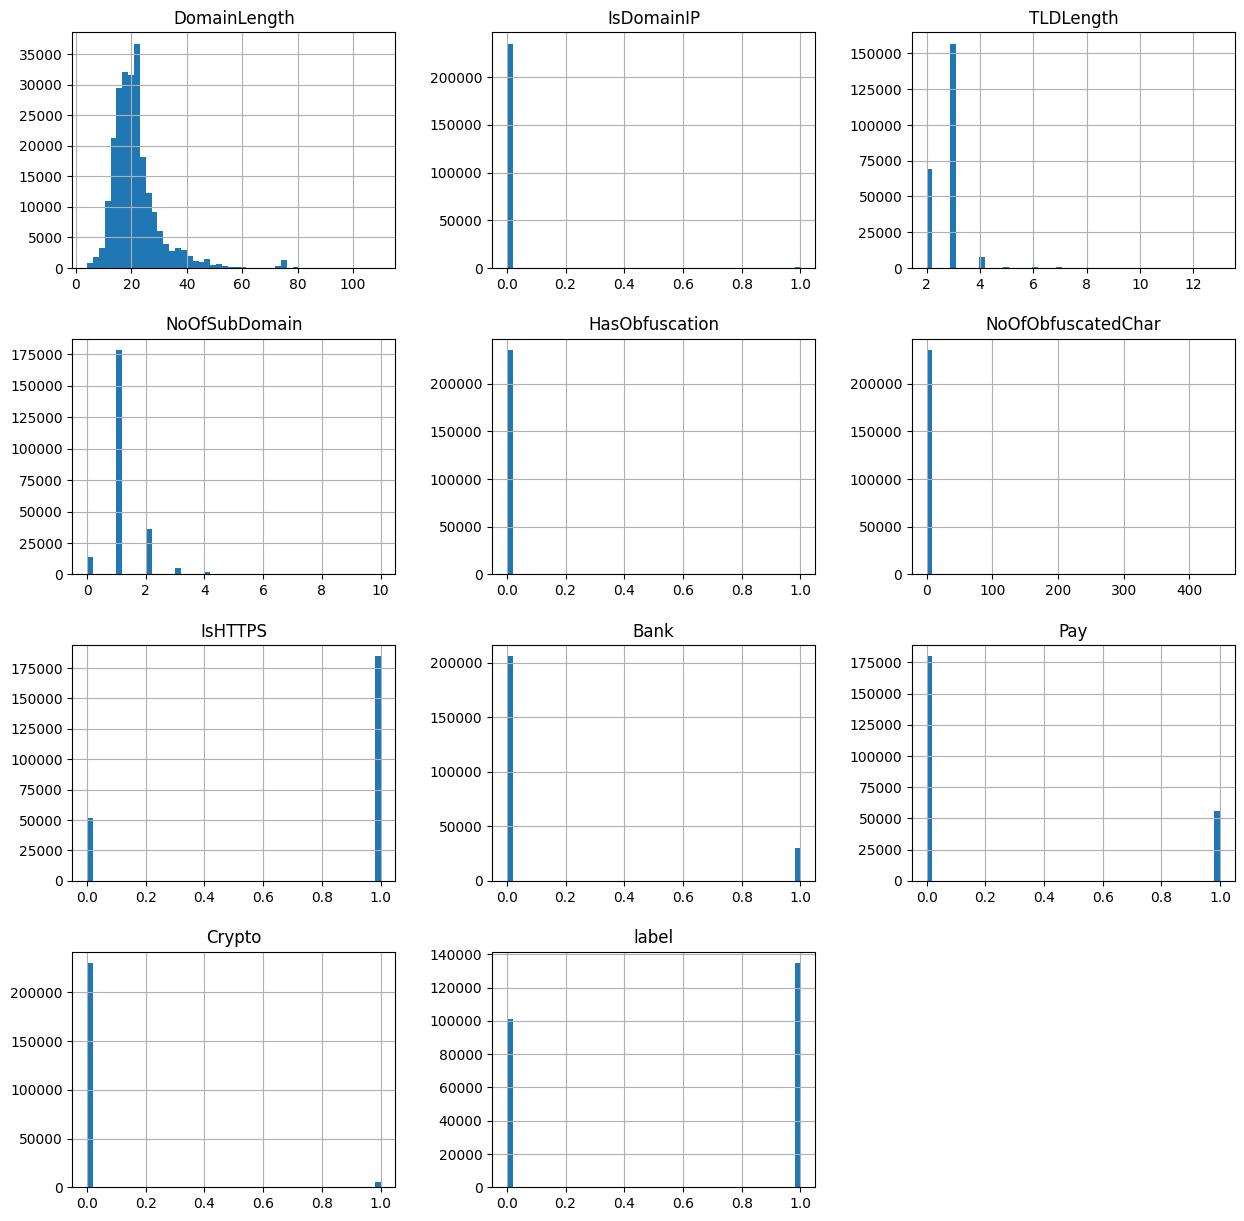

In [15]:
#Plotting the data distribution
df.hist(bins = 50,figsize = (15,15))
plt.show()

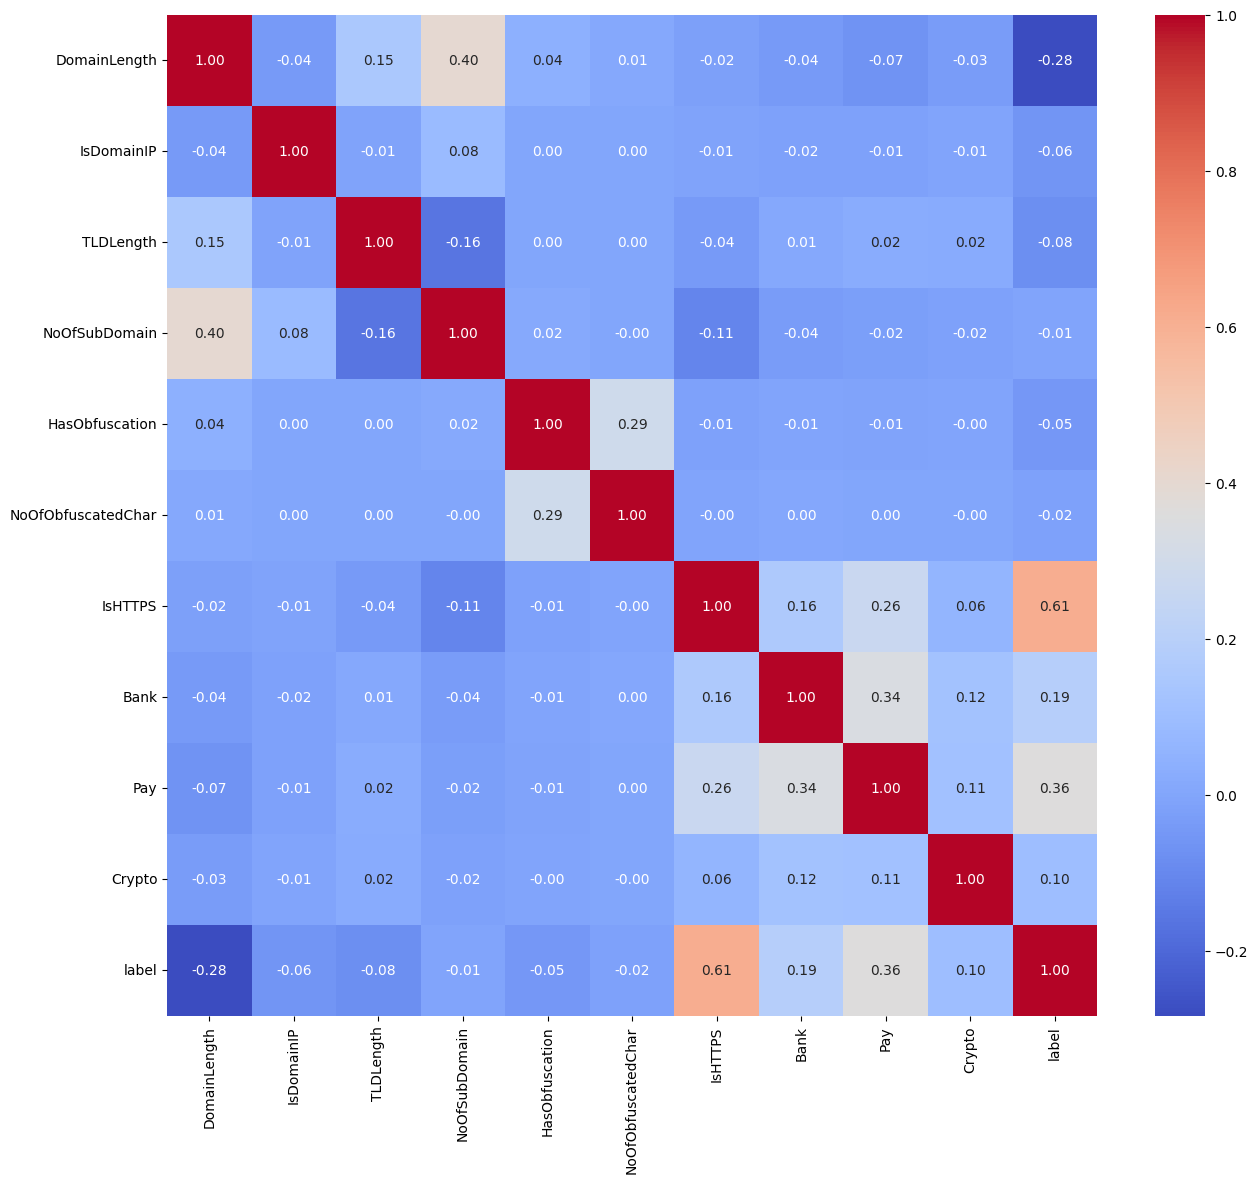

In [16]:
# Select only numeric features for correlation analysis
numeric_df = df.select_dtypes(include=np.number)

# Now create the heatmap using the numeric DataFrame
plt.figure(figsize=(15, 13))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [17]:
df.describe()

,DomainLength,IsDomainIP,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,IsHTTPS,Bank,Pay,Crypto,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,21.470396,0.002706,2.764456,1.164758,0.002057,0.024861,0.782625,0.127089,0.237007,0.023474,0.571895
std,9.150793,0.051946,0.599739,0.600969,0.045306,1.876249,0.412461,0.333074,0.425247,0.151403,0.494805
min,4.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,110.000000,1.000000,13.000000,10.000000,1.000000,447.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='label', ylabel='count'>

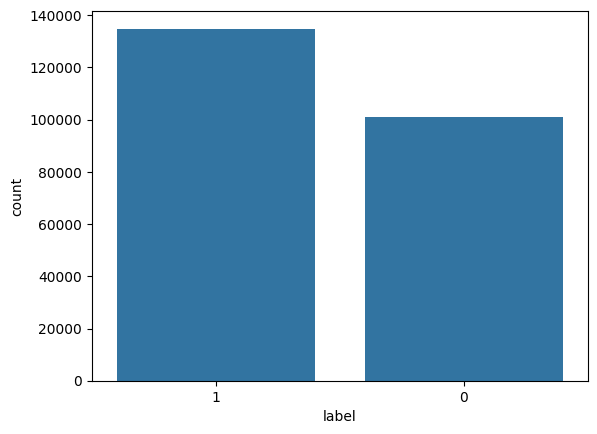

In [18]:
import seaborn as sns
sns.countplot(data=df,
              x='label',
              order=df['label'].value_counts().index)

In [19]:
pip install tldextract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 5.2 MB/s eta 0:00:00


In [20]:
import tldextract

# Function to extract the main domain (without www or TLD)
def get_core_domain(url):
    ext = tldextract.extract(url)
    return ext.domain  # Only the second-level domain (like "voicefmradio")

# Apply to the 'domain' column
df['Domain'] = df['Domain'].apply(get_core_domain)

In [21]:
df = df[df['Domain'].notnull() & (df['Domain'] != '')]
df = df[(df['DomainLength'] > 3) & (df['DomainLength'] < 100)]
df = df.drop_duplicates(subset='Domain')
signal_cols = ['IsDomainIP', 'HasObfuscation', 'NoOfObfuscatedChar', 'Bank', 'Pay', 'Crypto']
df = df[~(df[signal_cols] == 0).all(axis=1)]
df = df[(df['DomainLength'] > 3) & (df['DomainLength'] < 100)]
df.shape

(59889, 12)

In [22]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

x_train, x_test, y_train, y_test = train_test_split(df['Domain'],
                                                    df['label'],
                                                    test_size=0.3,
                                                    random_state=42)

vectorization = TfidfVectorizer(stop_words='english')
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

start = time.perf_counter()
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)
train_time = time.perf_counter() - start

start = time.perf_counter()
y_pred_sk = model.predict(x_test)
test_time = time.perf_counter() - start

sk_results = {
    "Implementation": "Scikit SVM",
    "Accuracy": accuracy_score(y_test, y_pred_sk),
    "Train Time (s)": train_time,
    "Test Time (s)": test_time,
}

print(sk_results)


{'Implementation': 'Scikit SVM', 'Accuracy': 0.967328992040964, 'Train Time (s)': 108.73409847100004, 'Test Time (s)': 5.14086027999997}


In [23]:
pip install scikit-learn-intelex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.3/110.3 MB 8.8 MB/s eta 0:00:00


In [24]:
from sklearn import svm
# --- INTEL oneAPI ACCELERATION ---
from sklearn.pipeline import Pipeline
from sklearnex import patch_sklearn
patch_sklearn()

# Re-train with acceleration
# Re-train with acceleration
oneapi_pipeline = Pipeline([
    ('classifier', svm.SVC(kernel='linear'))
])

start = time.perf_counter()
oneapi_pipeline.fit(x_train, y_train)
train_time = time.perf_counter() - start

start = time.perf_counter()
y_pred_oneapi = oneapi_pipeline.predict(x_test)
test_time = time.perf_counter() - start

intel_results = {
    "Implementation": "Intel oneAPI",
    "Accuracy": accuracy_score(y_test, y_pred_oneapi),
    "Train Time (s)": train_time,
    "Test Time (s)": test_time,
}
print(intel_results)

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


{'Implementation': 'Intel oneAPI', 'Accuracy': 0.967328992040964, 'Train Time (s)': 41.34394446800002, 'Test Time (s)': 7.205492865999986}


In [25]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 592, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 592 (delta 125), reused 82 (delta 82), pack-reused 434 (from 3)
Receiving objects: 100% (592/592), 194.79 KiB | 1.02 MiB/s, done.
Resolving deltas: 100% (299/299), done.
Installing RAPIDS remaining 25.04 libraries
Using Python 3.11.12 environment at: /usr
Resolved 173 packages in 968ms
 Downloaded cuproj-cu12
 Downloaded rmm-cu12
 Downloaded shapely
 Downloaded cudf-cu12
 Downloaded libkvikio-cu12
 Downloaded datashader
 Downloaded ucx-py-cu12
 Downloaded dask
 Downloaded bokeh
 Downloaded cugraph-cu12
 Downloaded librmm-cu12
 Downloaded cuspatial-cu12
 Downloaded pylibcugraph-cu12
 Downloaded cuml-cu12
 Downloaded cucim-cu12
 Downloaded libcuspatial-cu12
 Downloaded libraft-cu12
 Downloaded pylibcudf-cu12
 Downloaded libcudf-cu12
 Downloaded raft-dask-cu12
 Downloaded libcuml-cu12
 Downloaded libcuvs

In [26]:
import cuml
cuml.__version__

'25.04.00'

In [27]:
import cudf
import cupy as cp
from cuml.preprocessing import LabelEncoder, OneHotEncoder
from cuml.svm import SVC as cuSVC
from sklearn.model_selection import train_test_split
from cuml.feature_extraction.text import TfidfVectorizer
import math
import matplotlib.pyplot as plt
import itertools

import numpy as np
%matplotlib inline

In [28]:
# --- NVIDIA RAPIDS cuML ACCELERATION ---
from cuml.feature_extraction.text import TfidfVectorizer

x_train, x_test, y_train, y_test = train_test_split(df['Domain'],
                                                    df['label'],
                                                    test_size=0.3,
                                                    random_state=42)
tfidf_vectorizer = TfidfVectorizer()
X_train_cudf = tfidf_vectorizer.fit_transform(cudf.Series(x_train))
X_test_cudf = tfidf_vectorizer.transform(cudf.Series(x_test))

# Train cuML SVM
start = time.perf_counter()
cuml_model = cuSVC(kernel='linear')
cuml_model.fit(X_train_cudf, y_train)
train_time = time.perf_counter() - start

# Predict and time testing
start = time.perf_counter()
y_pred_cuml = cuml_model.predict(X_test_cudf)
test_time = time.perf_counter() - start

gpu_results = {
    "Implementation": "NVIDIA RAPIDS",
    "Accuracy": accuracy_score(y_test, y_pred_cuml.get()),
    "Train Time (s)": train_time,
    "Test Time (s)": test_time,
}
print(gpu_results)

[2025-05-03 22:07:56.590] [CUML] [warning] SVC with the linear kernel can be much faster using the specialized solver provided by LinearSVC. Consider switching to LinearSVC if tranining takes too long.
{'Implementation': 'NVIDIA RAPIDS', 'Accuracy': 0.9673846496354428, 'Train Time (s)': 8.92722939600003, 'Test Time (s)': 0.2669808319999447}


In [29]:
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Use tensorflow.keras for preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
from torch.utils.data import DataLoader, TensorDataset

# Set max length (e.g., longest domain)
max_len = df['Domain'].apply(len).max()

# Tokenize at character level
tokenizer = Tokenizer(char_level=True, lower=True)
tokenizer.fit_on_texts(df['Domain'])
X_seq = tokenizer.texts_to_sequences(df['Domain'])

# Pad sequences
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post')

# Encode labels
y = df['label'].values

In [30]:
X_tensor = torch.tensor(X_pad, dtype=torch.long)
y_tensor = torch.tensor(y, dtype=torch.long)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

train_ds = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)


In [31]:
import torch.nn as nn

class DomainCharNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, max_len):
        super(DomainCharNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size + 1, embed_dim, padding_idx=0)
        self.fc1 = nn.Linear(embed_dim * max_len, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(hidden_dim, 2)  # binary classification

    def forward(self, x):
        x = self.embedding(x)
        x = x.view(x.size(0), -1)  # flatten
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize model
vocab_size = len(tokenizer.word_index)
model = DomainCharNN(vocab_size=vocab_size, embed_dim=16, hidden_dim=64, max_len=max_len)

In [35]:
import torch.optim as optim
import time

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
start = time.perf_counter()
model.train()
for epoch in range(10):
    for xb, yb in train_loader:
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
train_time = time.perf_counter() - start

# Evaluation
model.eval()

with torch.no_grad():
    start = time.perf_counter()
    preds = model(X_test).argmax(dim=1)
    test_time = time.perf_counter() - start
    acc = (preds == y_test).float().mean().item()


neural_results = {
    "Implementation": "Pytorch",
    "Accuracy": acc,
    "Train Time (s)": train_time,
    "Test Time (s)": test_time,
}

  Implementation  Accuracy  Train Time (s)  Test Time (s)
0     Scikit SVM  0.967329      108.734098       5.140860
1   Intel oneAPI  0.967329       41.343944       7.205493
2  NVIDIA RAPIDS  0.967385        8.927229       0.266981
3        Pytorch  0.962264       30.735073       0.018198


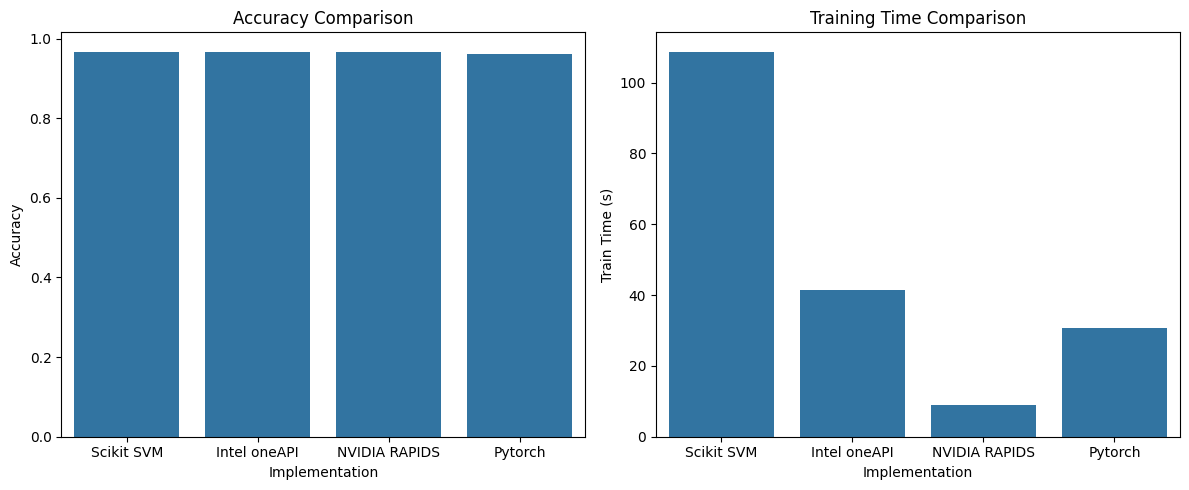

In [36]:
# --- PERFORMANCE COMPARISON ---
results_df = pd.DataFrame([sk_results, intel_results, gpu_results,neural_results])
print(results_df)

# --- PLOT COMPARISON ---
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='Implementation', y='Accuracy', data=results_df)
plt.title('Accuracy Comparison')

plt.subplot(1,2,2)
sns.barplot(x='Implementation', y='Train Time (s)', data=results_df)
plt.title('Training Time Comparison')

plt.tight_layout()
plt.show()

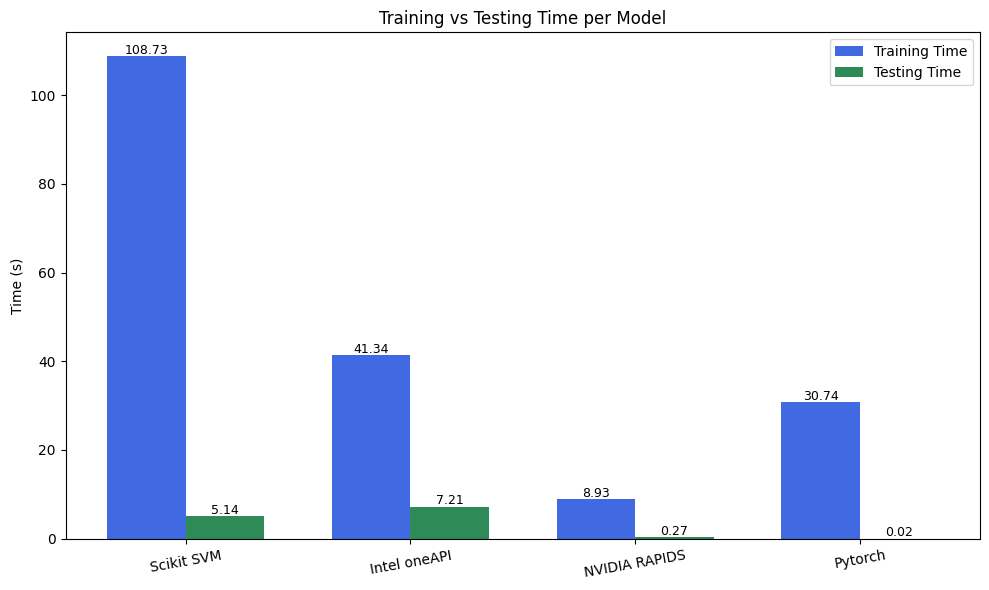

In [40]:
x = np.arange(len(results_df))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, results_df['Train Time (s)'], width, label='Training Time', color='royalblue')
bars2 = ax.bar(x + width/2, results_df['Test Time (s)'], width, label='Testing Time', color='seagreen')

# Labels
ax.set_ylabel('Time (s)')
ax.set_title('Training vs Testing Time per Model')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Implementation'], rotation=10)
ax.legend()

# Annotate
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()